In [82]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Get Data

In [3]:
from nextwind.preproc import make_datasets

In [4]:
datasets = make_datasets(forecast_data='MERRA2') # Tuple containing train, val & test sets

### Fetching 25xWTG data ###
### Fetching weather forecast data from MERRA2 ###
### Preparing train, val & test datasets ###


In [5]:
pd.DataFrame(datasets['train'][0])

,Power,Rotor Speed,Wind Speed,Blade Pitch,Nacelle_X,Nacelle_Y,Wind_X,Wind_Y,Forecast_wind_speed,Forecast_X,Forecast_Y
2019-05-05 00:00:00,1731.108333,0.939035,0.552721,0.005690,-0.529919,0.848048,0.472108,0.881540,6.5,-0.406737,0.913545
2019-05-05 01:00:00,1560.105000,0.911993,0.528627,0.005817,-0.529919,0.848048,0.474748,0.880122,6.2,-0.453990,0.891007
2019-05-05 02:00:00,1892.961667,0.953126,0.568535,0.014250,-0.529919,0.848048,-0.508783,0.860895,5.7,-0.453990,0.891007
2019-05-05 03:00:00,1921.246667,0.957680,0.572961,0.011046,-0.529919,0.848048,0.491008,0.871155,5.4,-0.469472,0.882948
2019-05-05 04:00:00,1912.378333,0.958763,0.561913,0.011816,-0.529919,0.848048,-0.490750,0.871301,5.2,-0.469472,0.882948
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-09 16:00:00,1304.811667,0.866975,0.493965,0.006366,0.990075,0.140538,-0.992438,-0.122744,3.8,0.848048,0.529919
2021-01-09 17:00:00,679.336667,0.707773,0.390826,0.005838,0.955060,0.296413,-0.233560,-0.972342,4.0,0.809017,0.587785
2021-01-09 18:00:00,215.255000,0.610435,0.270462,0.027735,0.749775,0.661693,0.161679,-0.986843,4.1,0.754710,0.656059
2021-01-09 19:00:00,100.945000,0.601815,0.224977,0.036864,0.531183,0.847257,-0.536257,-0.844055,4.2,0.669131,0.743145


# Create sequence window

In [3]:
from nextwind.preproc import SequenceGenerator

In [4]:
n_steps_in = 48
n_steps_out = 12

In [83]:
window = SequenceGenerator(n_steps_in, n_steps_out, n_steps_out,
                           #datasets, load=False,
                           forecast_columns=['Forecast_wind_speed', 'Forecast_X', 'Forecast_Y'],
                           label_columns=['Power'])

### Window details ### 
 Total window size: 60
Input column name(s): ['Power', 'Rotor Speed', 'Wind Speed', 'Blade Pitch', 'Nacelle_X', 'Nacelle_Y', 'Wind_X', 'Wind_Y', 'Forecast_wind_speed', 'Forecast_X', 'Forecast_Y']
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Forecast column name(s): ['Forecast_wind_speed', 'Forecast_X', 'Forecast_Y']
Forecast indices: [48 49 50 51 52 53 54 55 56 57 58 59]
Label column name(s): ['Power']
Label indices: [48 49 50 51 52 53 54 55 56 57 58 59] 

### Train Regr_48in_12out sequences loaded ###
### Val Regr_48in_12out sequences loaded ###
### Test Regr_48in_12out sequences loaded ###


# Retrieve sequences

In [84]:
# To retrieve the values again, or update window sequences with a new dataset
train, val, test = window.get_sequences()

### Train Regr_48in_12out sequences loaded ###
### Val Regr_48in_12out sequences loaded ###
### Test Regr_48in_12out sequences loaded ###


In [85]:
# Retrieve train set sequences
X_train, X_fc_train, y_train = window.train.values()
X_train.shape, y_train.shape

((6150, 48, 11), (6150, 12, 3))

In [86]:
# Retrieve train set sequences
X_val, X_fc_val, y_val = window.val.values()
X_val.shape, y_val.shape

((1750, 48, 11), (1750, 12, 3))

In [87]:
# Retrieve train set sequences
X_test, X_fc_test, y_test = window.test.values()
X_test.shape, y_test.shape

((875, 48, 11), (875, 12, 3))

In [ ]:
# This also works to retrieve specific datasets
X_train = window.train['X']

# Model Selection

In [88]:
from nextwind.trainer import compile_and_fit, plot_examples, plot_loss

In [89]:
val_performance = {}
test_performance = {}

## Baseline Model

In [12]:
from nextwind.models import Baseline_model

In [15]:
baseline = Baseline_model(window)

In [16]:
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance['Baseline'] = baseline.evaluate(x=window.val['X'], y=window.val['y'], verbose=1)
test_performance['Baseline'] = baseline.evaluate(x=window.test['X'], y=window.test['y'], verbose=1)

28/28 [==============================] - 0s 1ms/step - loss: 325931.2188 - mean_absolute_error: 446.4207


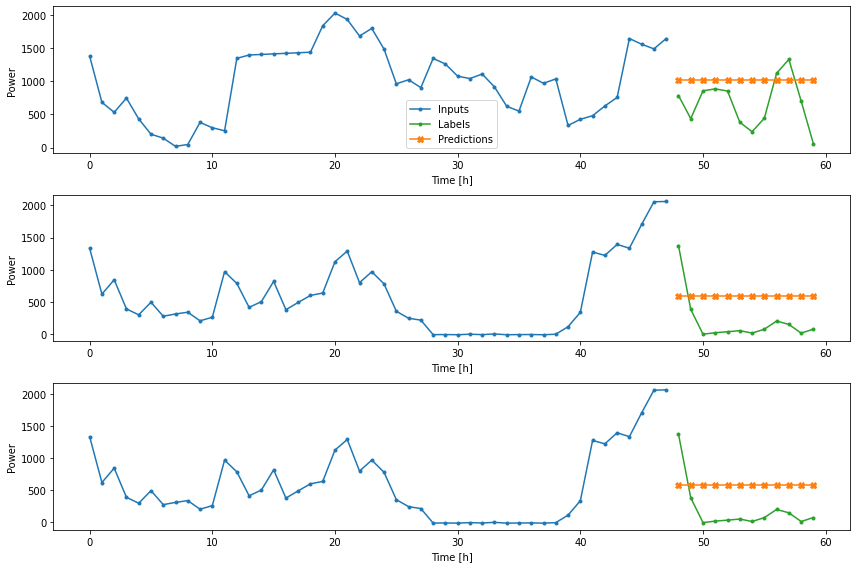

In [21]:
plot_examples(baseline, window, forecast=False)

## Dense_layer Model

In [18]:
num_features = window.val['X'].shape[1]

In [19]:
linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(n_steps_out*num_features),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([n_steps_out, num_features])
])

In [21]:
history = compile_and_fit('test1', linear_model, window, forecast=False)

Epoch 1/20
193/193 [==============================] - 1s 3ms/step - loss: 699190.6875 - mean_absolute_error: 619.0308 - val_loss: 685918.5000 - val_mean_absolute_error: 617.7237
Epoch 2/20
193/193 [==============================] - 0s 2ms/step - loss: 569493.1250 - mean_absolute_error: 553.3326 - val_loss: 559315.8750 - val_mean_absolute_error: 552.8970
Epoch 3/20
193/193 [==============================] - 0s 2ms/step - loss: 498121.0000 - mean_absolute_error: 515.2621 - val_loss: 494571.0938 - val_mean_absolute_error: 518.0837
Epoch 4/20
193/193 [==============================] - 0s 2ms/step - loss: 462810.4688 - mean_absolute_error: 494.7917 - val_loss: 463877.5000 - val_mean_absolute_error: 500.9299
Epoch 5/20
193/193 [==============================] - 0s 2ms/step - loss: 447266.7188 - mean_absolute_error: 484.7794 - val_loss: 451283.4062 - val_mean_absolute_error: 493.5566
Epoch 6/20
193/193 [==============================] - 0s 1ms/step - loss: 441335.3125 - mean_absolute_error: 4

In [30]:
plot_examples(linear_model, window, forecast=False)

ValueError: Your Layer or Model is in an invalid state. This can happen for the following cases:
 1. You might be interleaving estimator/non-estimator models or interleaving models/layers made in tf.compat.v1.Graph.as_default() with models/layers created outside of it. Converting a model to an estimator (via model_to_estimator) invalidates all models/layers made before the conversion (even if they were not the model converted to an estimator). Similarly, making a layer or a model inside a a tf.compat.v1.Graph invalidates all layers/models you previously made outside of the graph.
2. You might be using a custom keras layer implementation with  custom __init__ which didn't call super().__init__.  Please check the implementation of <class 'keras.engine.sequential.Sequential'> and its bases.

## LSTM Model

In [101]:
!pip install graphviz

In [103]:
import pydot
import graphviz

In [124]:
from nextwind.models import lstm_regressor_model

In [125]:
lstm_model = lstm_regressor_model(window)

In [126]:
lstm_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_36 (InputLayer)          [(None, 48, 11)]     0           []                               
                                                                                                  
 input_37 (InputLayer)          [(None, 12, 3)]      0           []                               
                                                                                                  
 lstm_58 (LSTM)                 (None, 48, 64)       19456       ['input_36[0][0]']               
                                                                                                  
 lstm_61 (LSTM)                 (None, 12, 64)       17408       ['input_37[0][0]']               
                                                                                              

In [ ]:
history = compile_and_fit(lstm_model, window, epoch=5)

Epoch 1/5
193/193 [==============================] - 49s 217ms/step - loss: 720320.8750 - mean_absolute_error: 654.3491 - val_loss: 635924.0625 - val_mean_absolute_error: 650.6038
Epoch 2/5
193/193 [==============================] - 42s 218ms/step - loss: 554804.5000 - mean_absolute_error: 590.9683 - val_loss: 570618.9375 - val_mean_absolute_error: 605.9086
Epoch 3/5
193/193 [==============================] - 39s 204ms/step - loss: 525034.7500 - mean_absolute_error: 564.6296 - val_loss: 658911.4375 - val_mean_absolute_error: 622.8495
Epoch 4/5
 81/193 [===========>..................] - ETA: 21s - loss: 522471.2188 - mean_absolute_error: 557.5659

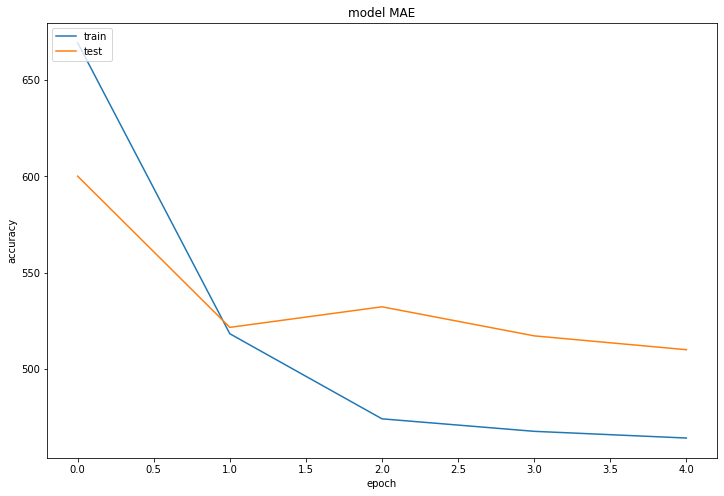

In [120]:
plot_loss(history)

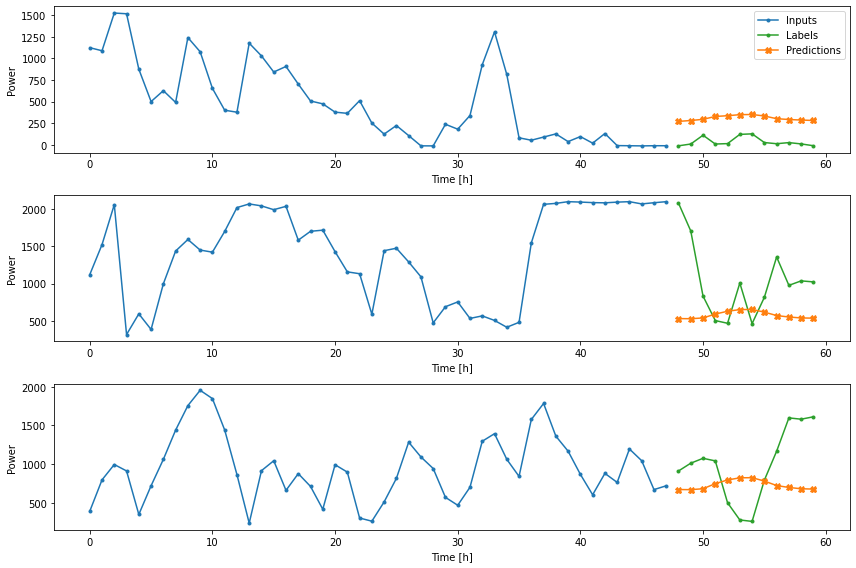

In [123]:
plot_examples(lstm_model, window)

In [80]:
from nextwind.trainer import trainer

In [81]:
trainer()

### Fetching 25xWTG data ###
### Fetching weather forecast data from MERRA2 ###
### Preparing train, val & test datasets ###
### Window details ### 
 Total window size: 30
Input column name(s): ['Power', 'Rotor Speed', 'Wind Speed', 'Blade Pitch', 'Nacelle_X', 'Nacelle_Y', 'Wind_X', 'Wind_Y', 'Forecast_wind_speed', 'Forecast_X', 'Forecast_Y']
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Forecast column name(s): ['Forecast_wind_speed', 'Forecast_X', 'Forecast_Y']
Forecast indices: [24 25 26 27 28 29]
Label column name(s): ['Power']
Label indices: [24 25 26 27 28 29] 

### Generating train sequences ###
Train sequences saved under './nextwind/data/Sequences__Regr_24in_6out_<X/X_fc/y>_train.npy
### Generating val sequences ###
Val sequences saved under './nextwind/data/Sequences__Regr_24in_6out_<X/X_fc/y>_val.npy
### Generating test sequences ###
Test sequences saved under './nextwind/data/Sequences__Regr_24in_6out_<X/X_fc/y>_test.npy
### Train 

TypeError: in user code:

    File "/home/shmiggit/.pyenv/versions/3.8.12/envs/wind/lib/python3.8/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/home/shmiggit/.pyenv/versions/3.8.12/envs/wind/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/shmiggit/.pyenv/versions/3.8.12/envs/wind/lib/python3.8/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/home/shmiggit/.pyenv/versions/3.8.12/envs/wind/lib/python3.8/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/home/shmiggit/.pyenv/versions/3.8.12/envs/wind/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    TypeError: Exception encountered when calling layer "baseline_model" (type Baseline_model).
    
    in user code:
    
        File "/home/shmiggit/code/AmaurySalles/projectwind/nextwind/models.py", line 17, in call  *
            x = tf.expand_dims(inputs[:, :, self.label_indices], axis=-1)
    
        TypeError: tuple indices must be integers or slices, not tuple
    
    
    Call arguments received:
      • inputs=('tf.Tensor(shape=(None, 24, 11), dtype=float32)', 'tf.Tensor(shape=(None, 6, 3), dtype=float32)')
